
# 나이브 베이즈를 이용한 스팸 분류



# PROBLEM STATEMENT

- 5,574개의 이메일 메시지가 있으며, 스팸인지 아닌지의 정보를 가지고 있다.
- 컬럼 : text, spam
- spam 컬럼의 값이 1이면 스팸이고, 0이면 스팸이 아닙니다.
- 스팸인지 아닌지 분류하는 인공지능을 만들자 - 수퍼바이즈드 러닝의 분류 문제!


# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #1: IMPORT DATASET

emails.csv 읽기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os 

In [4]:
# 파일 경로를 잡아주는것
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [6]:
pd.read_csv('emails.csv')

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [7]:
spam_df =  pd.read_csv('emails.csv')

In [9]:
spam_df.head(3)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1


# STEP #2: VISUALIZE DATASET

## 스팸은 몇개이고, 아닌것은 몇개인지 확인하시오.

In [10]:
spam_df.head(3)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1


In [14]:
spam_df.shape

(5728, 2)

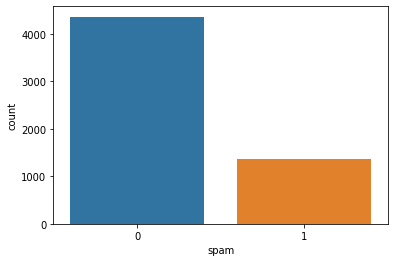

In [17]:
sns.countplot(data = spam_df, x = 'spam')
plt.show()

In [18]:
spam_df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

## 이메일의 길이가 스팸과 관련이 있는지 확인해 보려 합니다. 이메일의 문자 길이를 구해서, length 라는 컬럼을 만드세요. 

In [19]:
spam_df.head(3)



,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1


In [20]:
spam_df['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [21]:
spam_df['spam'][0]

1

In [24]:
spam_df['text'].apply(len)

0       1484
1        598
2        448
3        500
4        235
        ... 
5723    1189
5724    1167
5725    2131
5726    1060
5727    2331
Name: text, Length: 5728, dtype: int64

In [25]:
spam_df['text_len'] = spam_df['text'].apply(len)

In [26]:
spam_df.head()

,text,spam,text_len
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


## 글자 길이를 히스토그램으로 나타내시오.

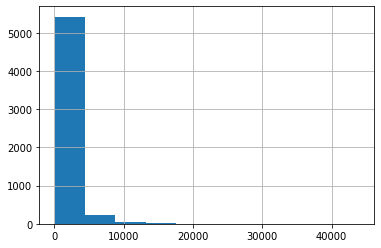

In [28]:
spam_df['text_len'].hist()
plt.show()

In [30]:
spam_df.corr()

# 텍스트는 안구해주니 알아서 텍스트 빼준다

,spam,text_len
spam,1.000000,-0.065686
text_len,-0.065686,1.000000


## 가장 긴 이메일을 찾아서 스팸인지 아닌지 확인하고, 이메일 내용을 확인하시오.

In [31]:
spam_df['text_len'].max()

43952

In [47]:
spam_df.loc[spam_df['text_len'] == spam_df['text_len'].max() ,  ]

,text,spam,text_len
2650,Subject: from the enron india newsdesk - april...,0,43952


In [48]:
spam_df.loc[spam_df['text_len'] == spam_df['text_len'].max() , 'text' ][2650]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

## 0은 스팸이 아니고, 1은 스팸입니다. 파이차트를 통해, 스팸과 스팸이 아닌것이 몇 퍼센트인지, 소수점 1자리 까지만 보여주세요.

In [38]:
spam_df.head()

,text,spam,text_len
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [45]:
spam_df.loc[spam_df['spam'] == 1 , 'spam' ]

0       1
1       1
2       1
3       1
4       1
       ..
1363    1
1364    1
1365    1
1366    1
1367    1
Name: spam, Length: 1368, dtype: int64

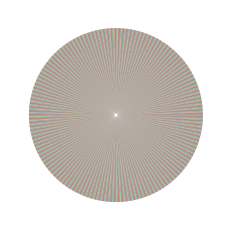

In [46]:
plt.pie(spam_df.loc[spam_df['spam'] == 1 , 'spam' ])
plt.show()

In [49]:
spam_df.head()

,text,spam,text_len
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [51]:
spam_count = spam_df['spam'].value_counts()

In [52]:
spam_count

0    4360
1    1368
Name: spam, dtype: int64

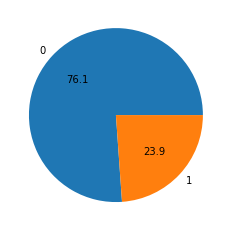

In [55]:
plt.pie(spam_count, autopct='%.1f', labels = spam_count.index)
plt.show()

## 스팸이 아닌것은 ham 변수로, 스팸인것은 spam 변수로 저장하시오.

In [56]:
spam_df

,text,spam,text_len
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [58]:
spam_df.loc[spam_df['spam'] == 0 , ]

,text,spam,text_len
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [59]:
ham = spam_df.loc[spam_df['spam'] == 0 , ]

In [60]:
spam = spam_df.loc[spam_df['spam'] == 1 , ]

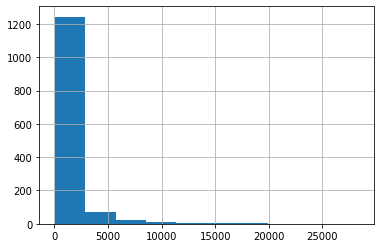

In [61]:
# 스팸의 이메일 길이를 히스토그램으로 나타내시오.
spam['text_len'].hist()
plt.show()

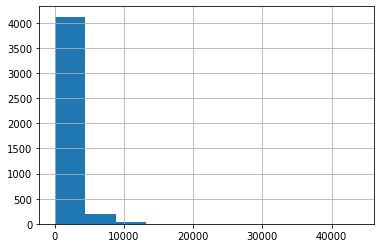

In [62]:
# 햄의 이메일 길이를 히스토그램으로 나타내시오.
ham['text_len'].hist()
plt.show()

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

# STEP 3.1 쉼표, 마침표 등의 구두점 제거하기

In [63]:
spam_df


,text,spam,text_len
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [64]:
Test = 'Hello Mr. Future, I am so happy to be learning AL now~'
# . , ~ 구두점

In [65]:
import string

In [66]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### 위의 문장에서, 글자를 앞에서부터 하나씩 가져와서, 구두점인지 확인한 후, 구두점이 아닌 문자만 리스트로 저장하시오.

In [ ]:
# 결과 예시)   [ 'H', 'e', 'l', ...  'M', 'r', ' ','F' ... ]

In [67]:
Test_punc_removed = []
for char in Test :
    if char not in string.punctuation :
    Test_punc_removed.append( char )

In [ ]:
[ char for char in Test if char not in string.punctuation ]
# 한줄로도 쓸수있다

In [68]:
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 ' ',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'L',
 ' ',
 'n',
 'o',
 'w']

### 위의 리스트에 있는 문자들을, 하나의 문자열로 만드시오.
### 결과 예시) 'Hello Mr Future ...'

In [69]:
Test_punc_removed_join = ''.join(Test_punc_removed)

In [70]:
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AL now'

# STEP 3.2 STOPWORDS(불용어) 제거하기
### Stopwords (불용어) 란? - https://bit.ly/34Ipha2

In [71]:
import nltk

In [72]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [73]:
from nltk.corpus import stopwords

In [80]:
my_stopwords = stopwords.words('english')
# 각 언어별로 만들어놓은 라이브러리

In [81]:
my_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### 구두점 제거한 문자열을, 이제 불용어 단어에 해당하지 않는 단어들만 모아서 리스트로 만드시오.
### 결과 예시) ['Hello', 'Mr', 'Future' ... ]

In [83]:
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AL now'

In [84]:
Test_punc_removed_join.split()

['Hello',
 'Mr',
 'Future',
 'I',
 'am',
 'so',
 'happy',
 'to',
 'be',
 'learning',
 'AL',
 'now']

In [85]:
Test_punc_removed_join_clean = []

for word in Test_punc_removed_join.split() :
    if word.lower() not in my_stopwords :
    Test_punc_removed_join_clean.append( word )

In [86]:
Test_punc_removed_join_clean

['Hello', 'Mr', 'Future', 'happy', 'learning', 'AL']

# STEP 3.3 COUNT VECTORIZER 

In [88]:
# 의미 없는 구두점도 제거했고, 의미 없는 단어도 제거 했으면,
# 이제는, 남아있는 단어들을 숫자로 바꿔줘야 한다.
# 단어를 숫자로 바꿔주는것을 벡터라이징 이라고 한다.

In [89]:
from sklearn.feature_extraction.text import CountVectorizer


In [90]:
sample_data = [ 'This is the first document',
               'I loved them',
               'This document is the second document',
               'I am loving you',
               'And this is the third one']

In [92]:
vec = CountVectorizer()

# 단어들을 다뽑아서 알파벳순으로 정렬해서 컬럼을만듬

In [94]:
X = vec.fit_transform(sample_data) 

In [98]:
X
# 14열의 문자열 단어들의 컬럼과
# 문자열 마다 5열의 각 컬럼에 해당하는것을 1로 입력했고 최대 5개다

<5x14 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [97]:
X.toarray()

# X를 array로 바꿔서 볼수있게 만듬

array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]])

In [99]:
X = X.toarray()

In [101]:
vec.get_feature_names_out()

# 벡터에 저장되있으므로 벡터에 저장된(X)의 컬럼데이터 가져옴

array(['am', 'and', 'document', 'first', 'is', 'loved', 'loving', 'one',
       'second', 'the', 'them', 'third', 'this', 'you'], dtype=object)

# 이제, 우리의 데이터프레임에 있는, 이메일 내용을 Cleaning 한다.

In [107]:

# 이제는 실제 이메일의 데이터를 가지고, 지금까지 한 작업들을 종합해서 처리해보자

# 1. 구두점 제거
# 2. 불용어 제거

# 이 두가지를 하나의 함수로 묶어서 사용하겠습니다. => 파이프라이닝 한다!

In [109]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
my_stopwords = stopwords.words('english')

def message_cleaning(sentence) :
  # 1. 구두점 제거
  Test_punc_removed = [ char for char in sentence if char not in string.punctuation ]
  # 2. 각 글자들을 하나의 문자열로 합친다.
  Test_punc_removed_join = ''.join(Test_punc_removed)
  # 3. 문자열에 불용어가 포함되어있는지 확인해서, 불용어 제거한다.
  Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in my_stopwords ] 
  # 4. 결과로 남은 단어들만 리턴한다.
  return Test_punc_removed_join_clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [110]:
message_cleaning('Hello~~! my name is , heheh! nice to meet you!!!@')

['Hello', 'name', 'heheh', 'nice', 'meet']

In [112]:
spam_df['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [113]:
message_cleaning( spam_df['text'][0] )

['Subject',
 'naturally',
 'irresistible',
 'corporate',
 'identity',
 'lt',
 'really',
 'hard',
 'recollect',
 'company',
 'market',
 'full',
 'suqgestions',
 'information',
 'isoverwhelminq',
 'good',
 'catchy',
 'logo',
 'stylish',
 'statlonery',
 'outstanding',
 'website',
 'make',
 'task',
 'much',
 'easier',
 'promise',
 'havinq',
 'ordered',
 'iogo',
 'company',
 'automaticaily',
 'become',
 'world',
 'ieader',
 'isguite',
 'ciear',
 'without',
 'good',
 'products',
 'effective',
 'business',
 'organization',
 'practicable',
 'aim',
 'hotat',
 'nowadays',
 'market',
 'promise',
 'marketing',
 'efforts',
 'become',
 'much',
 'effective',
 'list',
 'clear',
 'benefits',
 'creativeness',
 'hand',
 'made',
 'original',
 'logos',
 'specially',
 'done',
 'reflect',
 'distinctive',
 'company',
 'image',
 'convenience',
 'logo',
 'stationery',
 'provided',
 'formats',
 'easy',
 'use',
 'content',
 'management',
 'system',
 'letsyou',
 'change',
 'website',
 'content',
 'even',
 'structu

# 이메일의 내용을 벡터라이징 한다.

In [115]:
# 카운트 벡터라이저의, 애널라이저 파라미터에, 
# 우리가 만든 구두점과 불용어 제거해 주는 함수를, 셋팅해 주면
# 카운트 벡터라이저가, 지가 알아서 문자열을 깨끗하게 먼저 처리한 후에, 숫자로 바꿔준다.
vec = CountVectorizer(analyzer= message_cleaning)

In [116]:
X = vec.fit_transform( spam_df['text'] )




In [117]:
X

<5728x37229 sparse matrix of type '<class 'numpy.int64'>'
	with 565908 stored elements in Compressed Sparse Row format>

In [118]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [119]:
X = X.toarray()

In [120]:
vec.get_feature_names_out()

array(['\x01', '\x02', '\x03', ..., 'zzn', 'zzncacst', 'zzzz'],
      dtype=object)

In [121]:
y = spam_df['spam']

# STEP#4: TRAINING THE MODEL WITH ALL DATASET

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state= 15)

In [124]:
# 모델링

In [125]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [126]:
classifier1 = MultinomialNB()

In [127]:
classifier2 = GaussianNB()


In [128]:
classifier1.fit(X_train, y_train)

MultinomialNB()

In [129]:
classifier2.fit(X_train, y_train)

GaussianNB()

In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [131]:
y_pred1 = classifier1.predict(X_test)

In [132]:
y_pred1

array([0, 0, 0, ..., 1, 0, 1])

In [133]:
y_test.values

array([0, 0, 0, ..., 1, 0, 1])

In [134]:
confusion_matrix(y_test, y_pred1)

array([[857,  12],
       [  4, 273]])

In [135]:
accuracy_score(y_test, y_pred1)

0.9860383944153578

In [136]:
y_pred2 = classifier2.predict(X_test)

In [137]:
y_pred2

array([0, 0, 0, ..., 1, 0, 0])

In [138]:
y_test.values

array([0, 0, 0, ..., 1, 0, 1])

In [139]:
confusion_matrix(y_test, y_pred2)

array([[856,  13],
       [ 39, 238]])

In [140]:
accuracy_score(y_test, y_pred2)

0.9546247818499127

### 다음 2개의 문장을 테스트 해보시오.


In [141]:
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]

In [144]:
new_data = np.array(testing_sample)

In [146]:
new_data.shape

(2,)

In [152]:
new_data

array(['Free money!!!',
       'Hi Kim, Please let me know if you need any further information. Thanks'],
      dtype='<U70')

In [153]:
vec.transform(new_data)

<2x37229 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [154]:
X = vec.transform(new_data)

In [155]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [156]:
X = X.toarray()

In [157]:
classifier1.predict(X)

array([1, 0])

In [158]:
testing_sample = ['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th', 'money viagara!!!!!']


In [160]:
new_data = np.array(testing_sample)

In [161]:
new_data

array(['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th',
       'money viagara!!!!!'], dtype='<U70')

In [163]:
X = vec.transform(new_data)

In [164]:
X

<2x37229 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [168]:
X_test.shape

(1146, 37229)

In [169]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [165]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [166]:
classifier1.predict(X)

array([0, 1])

# STEP#4: Training셋과 Test셋으로 나눠서, 학습한다. 테스트셋은 20%로 한다. 

# STEP#5: 테스트셋으로 평가한다. 분류의 문제이므로 컨퓨전 매트릭스 확인. 

# WordCloud Visualizing - 스팸 이메일에는 어떤 단어들이 많이 들어있는지 Visualizing

[WordCloud 활용 예](https://t1.daumcdn.net/thumb/R720x0/?fname=http://t1.daumcdn.net/brunch/service/user/g7Y/image/QoUPiRwBMJoYAppVWNhMq4v8l-o)

In [170]:
from wordcloud import WordCloud, STOPWORDS

In [171]:
# 스팸 이메일에는 어떤 단어가 많이 들어있을까요?

In [172]:
# 워드 클라우드를 사용하려면,
# 1. 판다스의 스팸컬럼에 저장된 문자열을, 리스트로 먼저 받아오고
# 2. 리스트에 있는 문자열을 다 합쳐서 하나의 문자열로 만들어준다.

In [177]:
spam_email_list = spam['text'].tolist()

In [178]:
spam_email = ''.join(spam_email_list)

In [180]:
spam_email

'Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [198]:
# 불용어사전을 변수로만들고
my_stopwords = STOPWORDS

In [200]:
# 서브잭트 단어를 넣고
my_stopwords.add('subject')

In [ ]:
# 배경 모양을 이미지로 바꿀수 있다

In [189]:
from PIL import Image

In [193]:
img = Image.open('spam.png')

In [194]:
img_mask = np.array(img)

In [201]:
wc = WordCloud(background_color='white', mask= img_mask , stopwords= my_stopwords)
                                                       # 화면에 불용어를 빼려면  
                                        # 월드클라우드에 stopwords 파라미터에 넣음

In [202]:
wc.generate(spam_email)

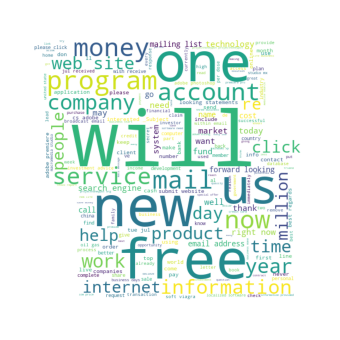

In [203]:
plt.figure(figsize = (10, 6))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [204]:
my_stopwords.add('us')
# us도 빼고싶다 하면 다시 뒤로가서 wc 저장하는 단계

In [205]:
wc = WordCloud(background_color='white', mask= img_mask , stopwords= my_stopwords)

In [207]:
wc.generate(spam_email)

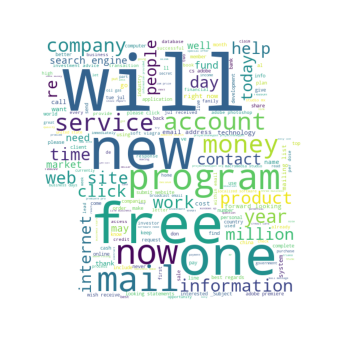

In [208]:
plt.figure(figsize = (10, 6))
plt.imshow(wc)
plt.axis('off')
plt.show()